# 1. Load and Inspect the Data

In [1]:
# Import the modules
import numpy as np # For numerical operations and calculations
import pandas as pd # To read and manipulate the lending data as a dataframe
from pathlib import Path # To specify the the file path for reading the csv file
from sklearn.preprocessing import StandardScaler # To scale the data
import seaborn as sns # To create pairplots and heatmaps to visualize data relationships and correlations
import matplotlib.pyplot as plt # To create and display visualizations, including heatmaps and confusion matrices
from scipy import stats # To calculate the Pearson correlation coefficient
from statsmodels.stats.outliers_influence import variance_inflation_factor # To test for multicolinearity in independant variables

In [2]:
# Reading the 1st credit card transaction data file from the resources folder into a pandas dataframe
fraud1_df = pd.read_csv(Path("Resources/fraudTest.csv"))

# Review the DataFrame
fraud1_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
# Reading the 2nd credit card transaction data file from the resources folder into a pandas dataframe
fraud2_df = pd.read_csv(Path("Resources/fraudTrain.csv"))

# Review the DataFrame
fraud2_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Use concat function to append fraud1_df and fraud2_df to create one dataframe
fraud_df = pd.concat([fraud1_df, fraud2_df], ignore_index=True)
fraud_df

# Save the fraud_df to a csv file for analysis in Tableau
file_path = "Fraud.csv"

# Use the to_csv method to export the DataFrame to a CSV file
fraud_df.to_csv(file_path, index=False)

In [5]:
# Drop the second column that was the original index column in the separate csv files (column index 1)
fraud_df.drop(fraud_df.columns[0], axis=1, inplace=True)
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
# Check if there are any null values in the dataframe
if fraud_df.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


In [7]:
# Drop the cc_num and trans_num columns as credit numbers are randomly generated by the banks and 
# have no link to whether fraud will be committed
fraud_df.drop(['cc_num','trans_num'], axis=1, inplace=True)
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [8]:
# Check datatypes of each column
fraud_df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
# Check statistics for numeric columns
# Ensure format of number in table will be with 2 decimal places and commas for thousands, millions etc
pd.options.display.float_format = '{:,.2f}'.format

# Display the statistics for numeric columns
fraud_df.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,"1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00","1,852,394.00"
mean,70.06,"48,813.26",38.54,-90.23,"88,643.67","1,358,674,218.83",38.54,-90.23,0.01
std,159.25,"26,881.85",5.07,13.75,"301,487.62","18,195,081.39",5.11,13.76,0.07
min,1.00,"1,257.00",20.03,-165.67,23.00,"1,325,376,018.00",19.03,-166.67,0.00
25%,9.64,"26,237.00",34.67,-96.80,741.00,"1,343,016,823.75",34.74,-96.90,0.00
50%,47.45,"48,174.00",39.35,-87.48,"2,443.00","1,357,089,331.00",39.37,-87.44,0.00
75%,83.10,"72,042.00",41.94,-80.16,"20,328.00","1,374,581,485.25",41.96,-80.25,0.00
max,"28,948.90","99,921.00",66.69,-67.95,"2,906,700.00","1,388,534,374.00",67.51,-66.95,1.00


## 2. Convert DateTime and Time columns into Unix Timestamps
### columns 'trans_date_trans_time'  and 'dob' 

In [10]:
# Convert the 'trans_date_trans_time' column to datetime objects
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

# Convert the 'trans_date_trans_time' column to Unix timestamps
fraud_df['trans_date_trans_time'] = (fraud_df['trans_date_trans_time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Convert the 'dob' column to datetime objects
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')

# Convert the 'dob' column to Unix timestamps
fraud_df['dob'] = (fraud_df['dob'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Check it worked
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,1592741665,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.97,-80.94,333497,Mechanical engineer,-56419200,1371816865,33.99,-81.20,0
1,1592741673,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.32,-110.44,302,"Sales professional, IT",632534400,1371816873,39.45,-109.96,0
2,1592741693,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.67,-73.54,34496,"Librarian, public",25315200,1371816893,40.50,-74.20,0
3,1592741715,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.57,-80.82,54767,Set designer,554169600,1371816915,28.81,-80.88,0
4,1592741717,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.25,-85.02,1126,Furniture designer,-457315200,1371816917,44.96,-85.88,0


In [11]:
# Check datatypes
fraud_df.dtypes

trans_date_trans_time      int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                        int64
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
# Scale the numeric columns.
# Scaling the data is necessary to ensure that features with different units or magnitudes have an equal 
# influence on machine learning algorithms and to enable efficient convergence.

# Define the columns you want to scale (assuming they are all numeric)
columns_to_scale = ['trans_date_trans_time', 'amt','zip','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your data and transform the specified columns
fraud_df[columns_to_scale] = scaler.fit_transform(fraud_df[columns_to_scale])

# Check it worked
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0.72,fraud_Kirlin and Sons,personal_care,-0.42,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,-0.73,-0.90,0.68,0.81,Mechanical engineer,-0.32,0.72,-0.89,0.66,0
1,0.72,fraud_Sporer-Keebler,personal_care,-0.25,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,1.31,0.35,-1.47,-0.29,"Sales professional, IT",0.93,0.72,0.18,-1.43,0
2,0.72,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,-0.18,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,-1.38,0.42,1.21,-0.18,"Librarian, public",-0.17,0.72,0.38,1.17,0
3,0.72,fraud_Haley Group,misc_pos,-0.06,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,-0.60,-1.97,0.68,-0.11,Set designer,0.79,0.72,-1.91,0.68,0
4,0.72,fraud_Johnston-Casper,travel,-0.42,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,0.03,1.13,0.38,-0.29,Furniture designer,-1.05,0.72,1.26,0.32,0


## 3. Implement target encoding for the individual categorical features and the 'is_fraud' target variable (except gender column)

In [13]:
# Implement target encoding for the 'merchant' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'merchant'
target_mean = fraud_df.groupby('merchant')['is_fraud'].mean()

# Replace merchant column with the target encoding
fraud_df['merchant'] = fraud_df['merchant'].map(target_mean)

In [14]:
# Implement target encoding for the 'category' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'job'
target_mean = fraud_df.groupby('category')['is_fraud'].mean()

# Replace category column with the target encoding
fraud_df['category'] = fraud_df['category'].map(target_mean)

In [15]:
# Implement target encoding for the 'first' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'first'
target_mean = fraud_df.groupby('first')['is_fraud'].mean()

# Replace first column with the target encoding
fraud_df['first'] = fraud_df['first'].map(target_mean)

In [16]:
# Implement target encoding for the 'last' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'last'
target_mean = fraud_df.groupby('last')['is_fraud'].mean()

# Replace last column with the target encoding
fraud_df['last'] = fraud_df['last'].map(target_mean)

In [17]:
# Implement target encoding for the 'street' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'street'
target_mean = fraud_df.groupby('street')['is_fraud'].mean()

# Replace street column with the target encoding
fraud_df['street'] = fraud_df['street'].map(target_mean)

In [18]:
# Implement target encoding for the 'city' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'city'
target_mean = fraud_df.groupby('city')['is_fraud'].mean()

# Replace city column with the target encoding
fraud_df['city'] = fraud_df['city'].map(target_mean)

In [19]:
# Implement target encoding for the 'state' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'state'
target_mean = fraud_df.groupby('state')['is_fraud'].mean()

# Replace state column with the target encoding
fraud_df['state'] = fraud_df['state'].map(target_mean)

In [20]:
# Implement target encoding for the 'job' feature and the 'is_fraud' target variable

# Calculate the mean 'is_fraud' for each 'job'
target_mean = fraud_df.groupby('job')['is_fraud'].mean()

# Replace job column with the target encoding
fraud_df['job'] = fraud_df['job'].map(target_mean)

# Check fraud_df
fraud_df

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0.72,0.00,0.00,-0.42,0.01,0.00,M,0.01,0.01,0.01,-0.73,-0.90,0.68,0.81,0.01,-0.32,0.72,-0.89,0.66,0
1,0.72,0.00,0.00,-0.25,0.01,0.01,F,0.00,0.00,0.00,1.31,0.35,-1.47,-0.29,0.00,0.93,0.72,0.18,-1.43,0
2,0.72,0.00,0.00,-0.18,0.00,0.01,F,0.00,0.00,0.01,-1.38,0.42,1.21,-0.18,0.00,-0.17,0.72,0.38,1.17,0
3,0.72,0.00,0.00,-0.06,0.01,0.01,M,0.00,0.00,0.01,-0.60,-1.97,0.68,-0.11,0.01,0.79,0.72,-1.91,0.68,0
4,0.72,0.00,0.00,-0.42,0.00,0.01,M,0.00,0.00,0.00,0.03,1.13,0.38,-0.29,0.01,-1.05,0.72,1.26,0.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0.72,0.00,0.00,-0.34,0.01,0.00,M,0.00,0.00,0.00,1.34,-0.16,-1.62,-0.29,0.00,-0.68,0.72,-0.33,-1.56,0
1852390,0.72,0.00,0.00,-0.12,0.01,0.01,M,0.01,0.01,0.01,-1.01,0.14,0.93,-0.29,0.01,0.35,0.72,0.07,0.87,0
1852391,0.72,0.00,0.00,0.23,0.01,0.00,M,0.00,0.00,0.01,1.47,-1.10,-1.13,-0.29,0.01,-0.35,0.72,-0.96,-1.08,0
1852392,0.72,0.00,0.00,0.03,0.00,0.00,M,0.00,0.00,0.01,0.33,0.95,-0.90,-0.29,0.00,0.39,0.72,0.83,-0.95,0


## 4. Convert gender feature from categorical to numerical (male-1, female-0)

In [21]:
# Replace "M" with 1 and "F" with 0 in the "gender" column
fraud_df['gender'] = fraud_df['gender'].replace({'M': 1, 'F': 0})

# Check it worked
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0.72,0.00,0.00,-0.42,0.01,0.00,1,0.01,0.01,0.01,-0.73,-0.90,0.68,0.81,0.01,-0.32,0.72,-0.89,0.66,0
1,0.72,0.00,0.00,-0.25,0.01,0.01,0,0.00,0.00,0.00,1.31,0.35,-1.47,-0.29,0.00,0.93,0.72,0.18,-1.43,0
2,0.72,0.00,0.00,-0.18,0.00,0.01,0,0.00,0.00,0.01,-1.38,0.42,1.21,-0.18,0.00,-0.17,0.72,0.38,1.17,0
3,0.72,0.00,0.00,-0.06,0.01,0.01,1,0.00,0.00,0.01,-0.60,-1.97,0.68,-0.11,0.01,0.79,0.72,-1.91,0.68,0
4,0.72,0.00,0.00,-0.42,0.00,0.01,1,0.00,0.00,0.00,0.03,1.13,0.38,-0.29,0.01,-1.05,0.72,1.26,0.32,0


In [22]:
# Save the fraud_encoded_df to CSV file
file_path = "Fraud_Encoded.csv"

# Use the to_csv method to export the DataFrame to a CSV file
fraud_df.to_csv(file_path, index=False)

In [23]:
# Check count of unique values per column
fraud_df.nunique()

trans_date_trans_time    1819551
merchant                     662
category                      14
amt                        60616
first                        298
last                         358
gender                         2
street                       416
city                         428
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          401
dob                          984
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [24]:
# Check dtypes per column
fraud_df.dtypes

trans_date_trans_time    float64
merchant                 float64
category                 float64
amt                      float64
first                    float64
last                     float64
gender                     int64
street                   float64
city                     float64
state                    float64
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                      float64
dob                      float64
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [25]:
# Check if there are any null values in the dataframe
if fraud_df.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


## 5. Check for relationships between features and target variable

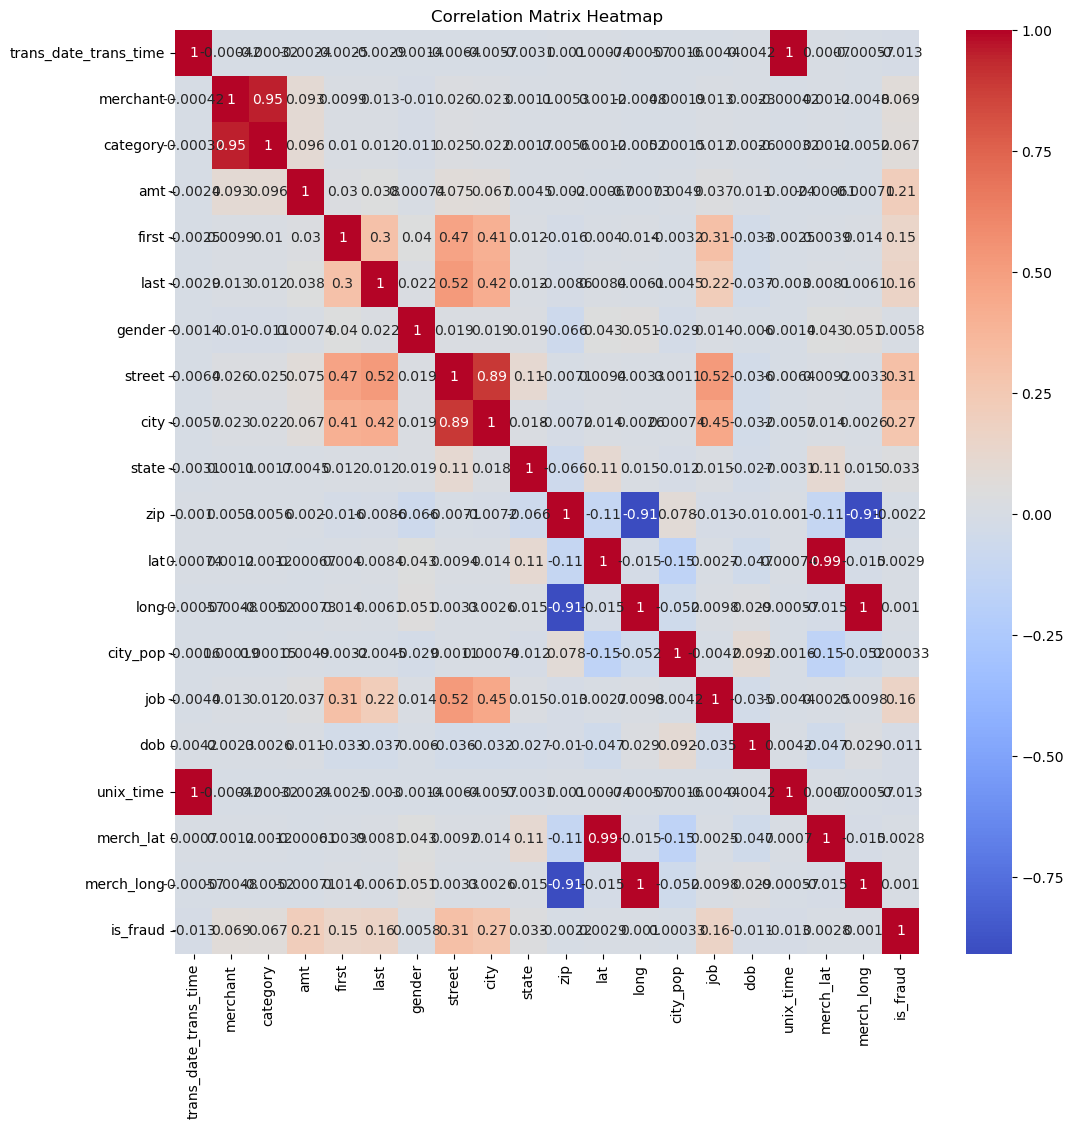

In [26]:
# Calculate the Pearson correlation coefficient to measure the linear relationship between variables
correlation_matrix = fraud_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

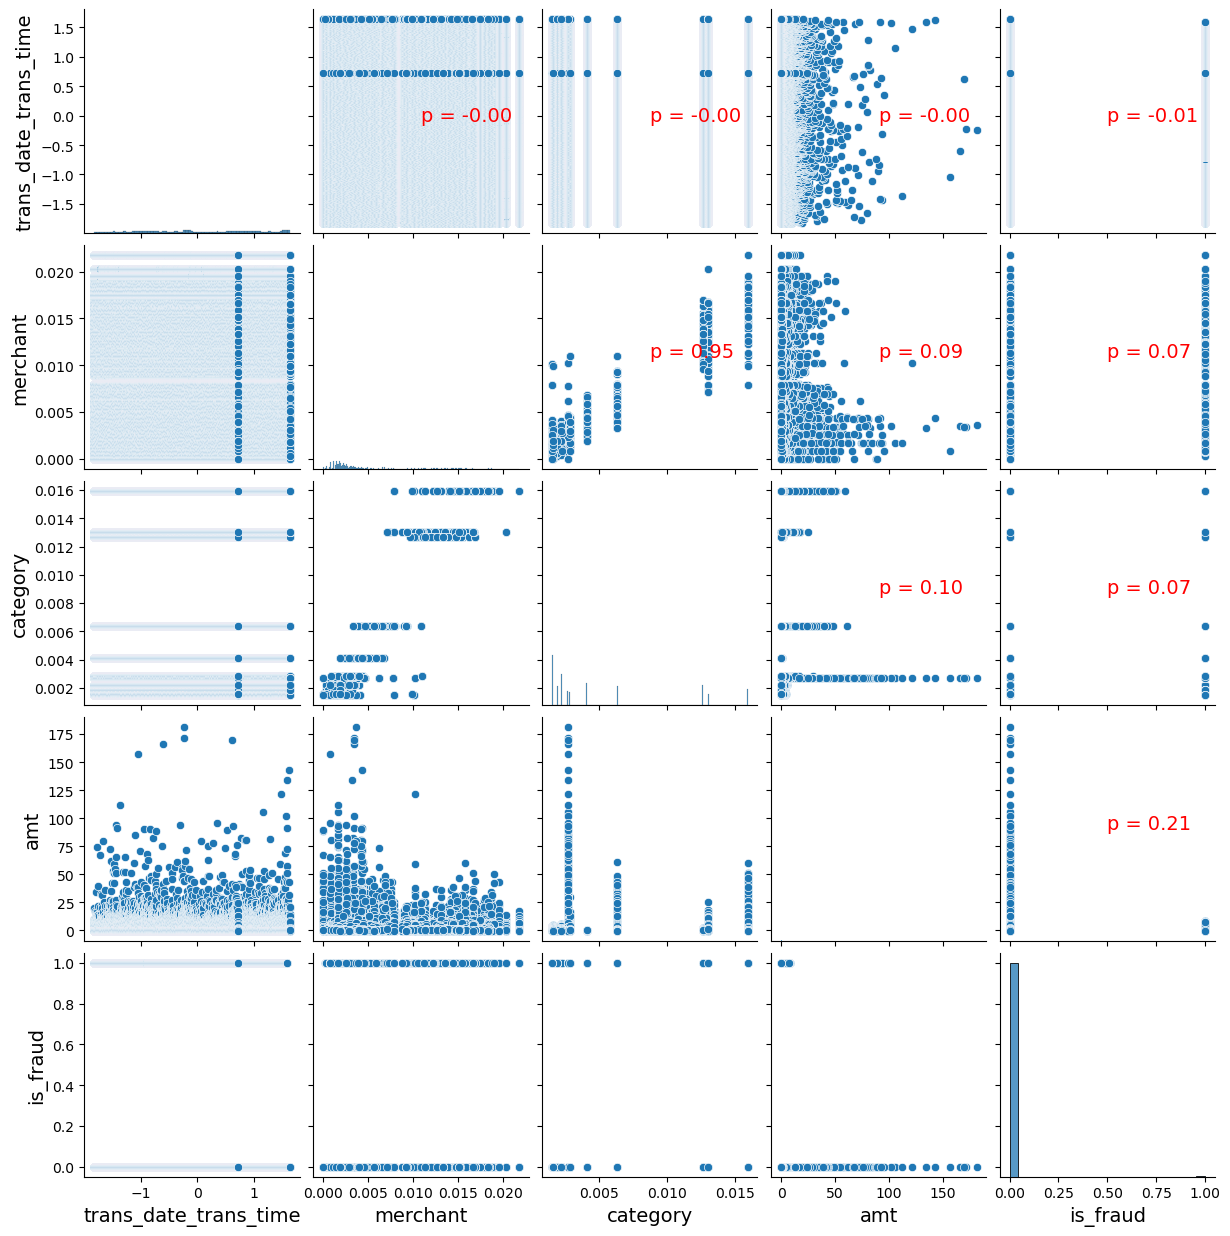

In [27]:
# Create scatterplot matrix to see distribution of single variables and relationships between two variables in fraud_df

# Select the columns you want to include in the scatterplot matrix
selected_columns = ['trans_date_trans_time','merchant','category','amt','is_fraud']

# Create the pairplot with the selected columns
g = sns.pairplot(fraud_df[selected_columns])

# Function to calculate and add correlation coefficients
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'p = {r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes, fontsize=14, color='red')

# Use the PairGrid object's map_upper method to add annotations
g.map_upper(corrfunc)

# Increase the size of x and y-axis labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Show the plot
plt.show()

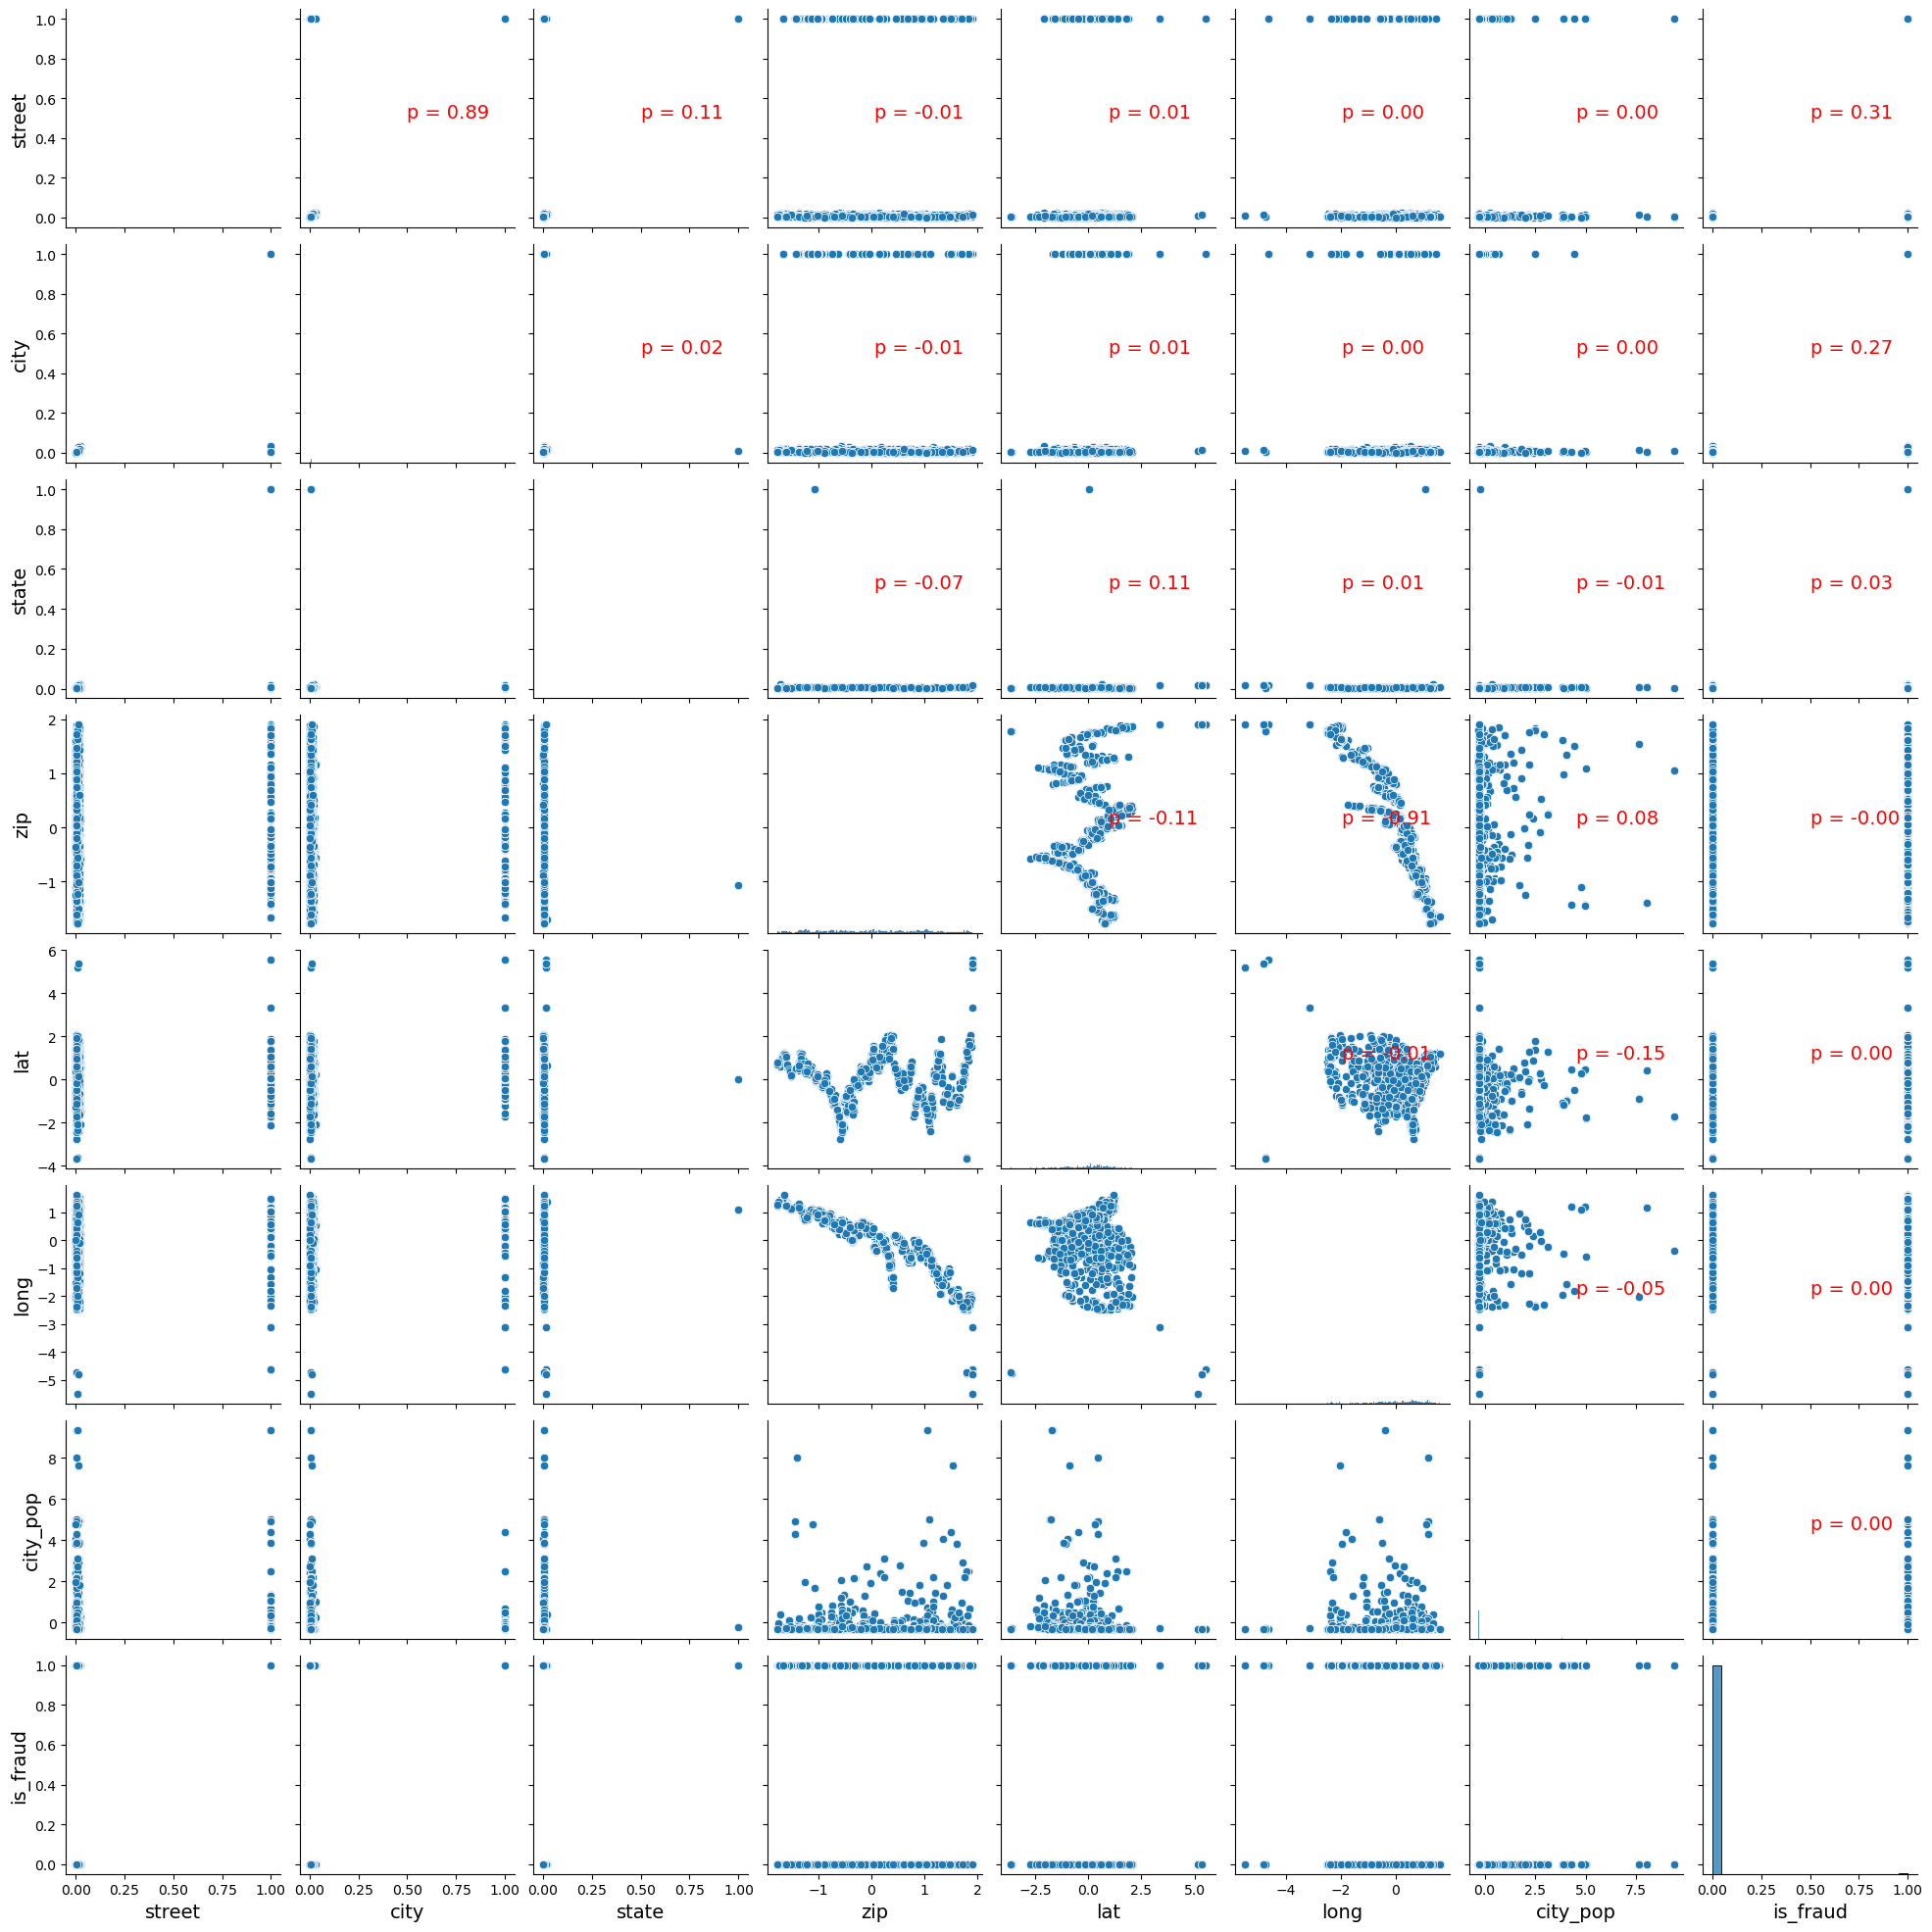

In [28]:
# Create scatterplot matrix to see distribution of single variables and relationships between two variables in fraud_df

# Select the columns you want to include in the scatterplot matrix
selected_columns = ['street','city','state','zip',
                    'lat','long','city_pop','is_fraud']

# Create the pairplot with the selected columns
g = sns.pairplot(fraud_df[selected_columns])

# Function to calculate and add correlation coefficients
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'p = {r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes, fontsize=14, color='red')

# Use the PairGrid object's map_upper method to add annotations
g.map_upper(corrfunc)

# Increase the size of x and y-axis labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Show the plot
plt.show()

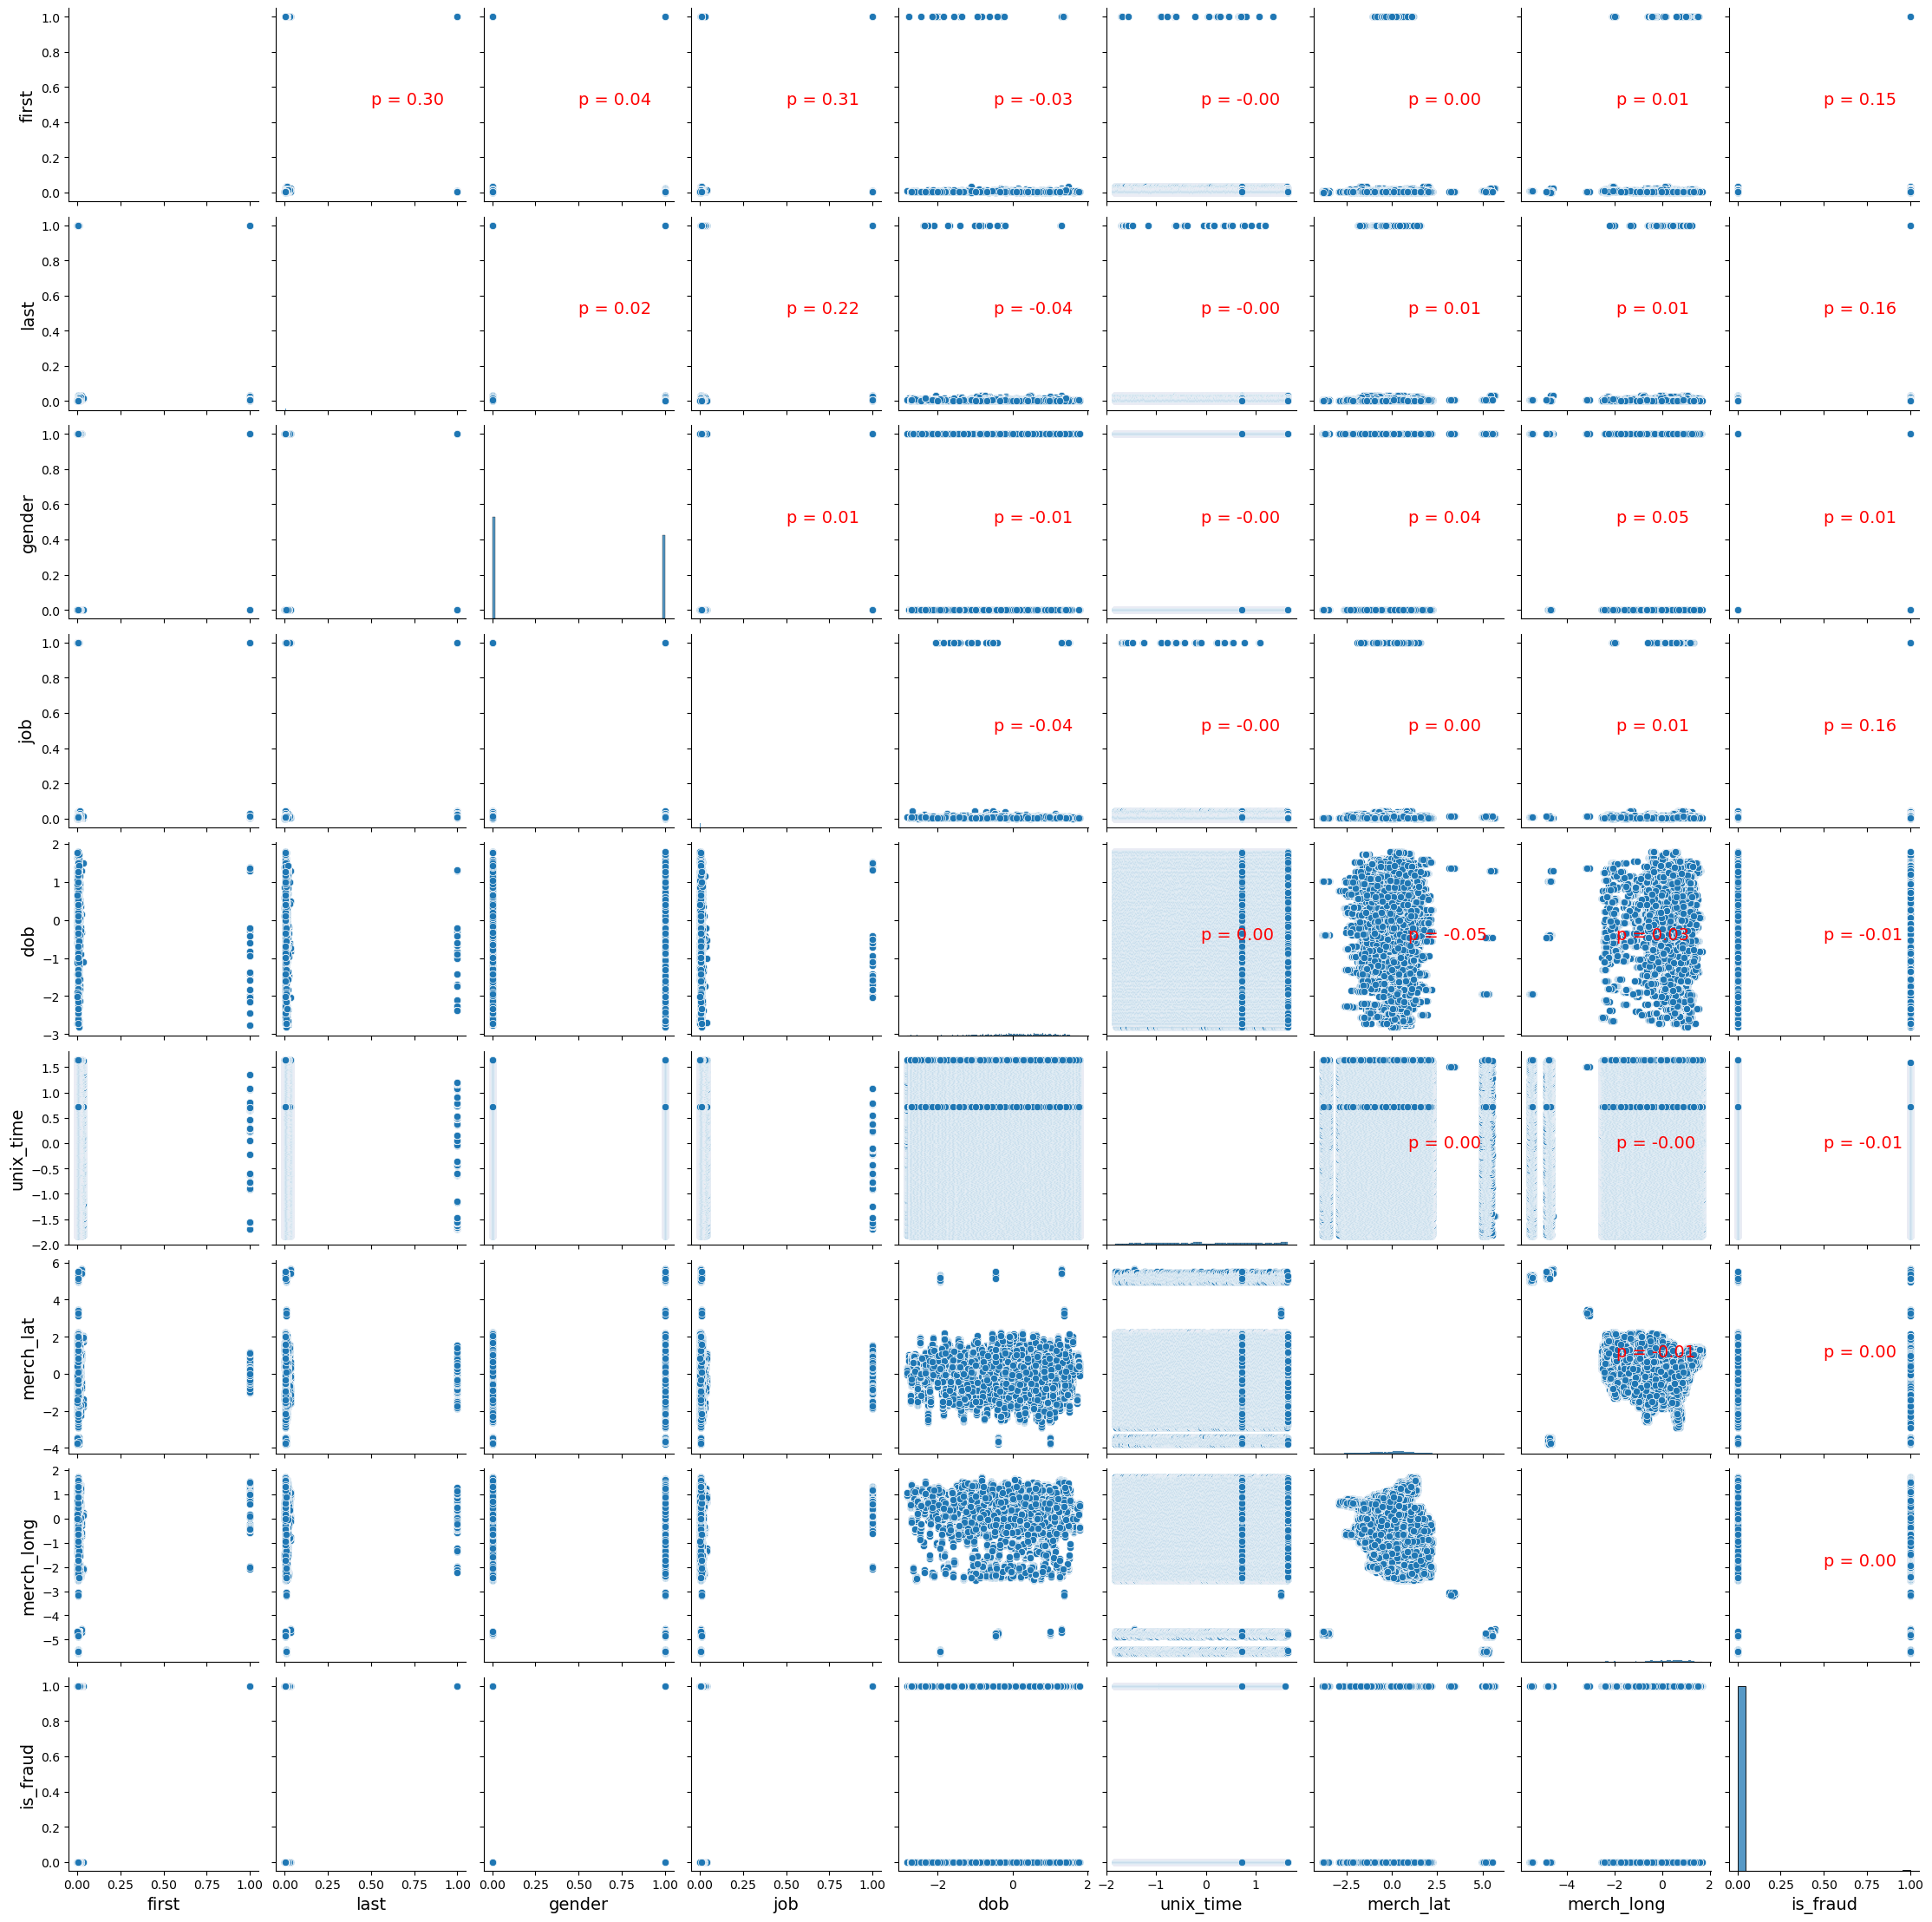

In [29]:
# Create scatterplot matrix to see distribution of single variables and relationships between two variables in fraud_df

# Select the columns you want to include in the scatterplot matrix
selected_columns = ['first','last','gender','job','dob',
                    'unix_time','merch_lat','merch_long','is_fraud']


# Create the pairplot with the selected columns
g = sns.pairplot(fraud_df[selected_columns])

# Function to calculate and add correlation coefficients
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'p = {r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes, fontsize=14, color='red')

# Use the PairGrid object's map_upper method to add annotations
g.map_upper(corrfunc)

# Increase the size of x and y-axis labels
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Show the plot
plt.show()

### As anticipated with fraud data, there is little to no significant correlation between the feature variables and the target variable. In fraud detection scenarios, a significant correlation between feature variables and the target variable (ie., "is_fraud") is not expected. This lack of correlation is because fraudulent activities are often designed to blend in with normal transactions and not exhibit easily detectable patterns. We will use machine learning models to identify subtle anomalies or deviations from the norm to identify fraudulent transactions.